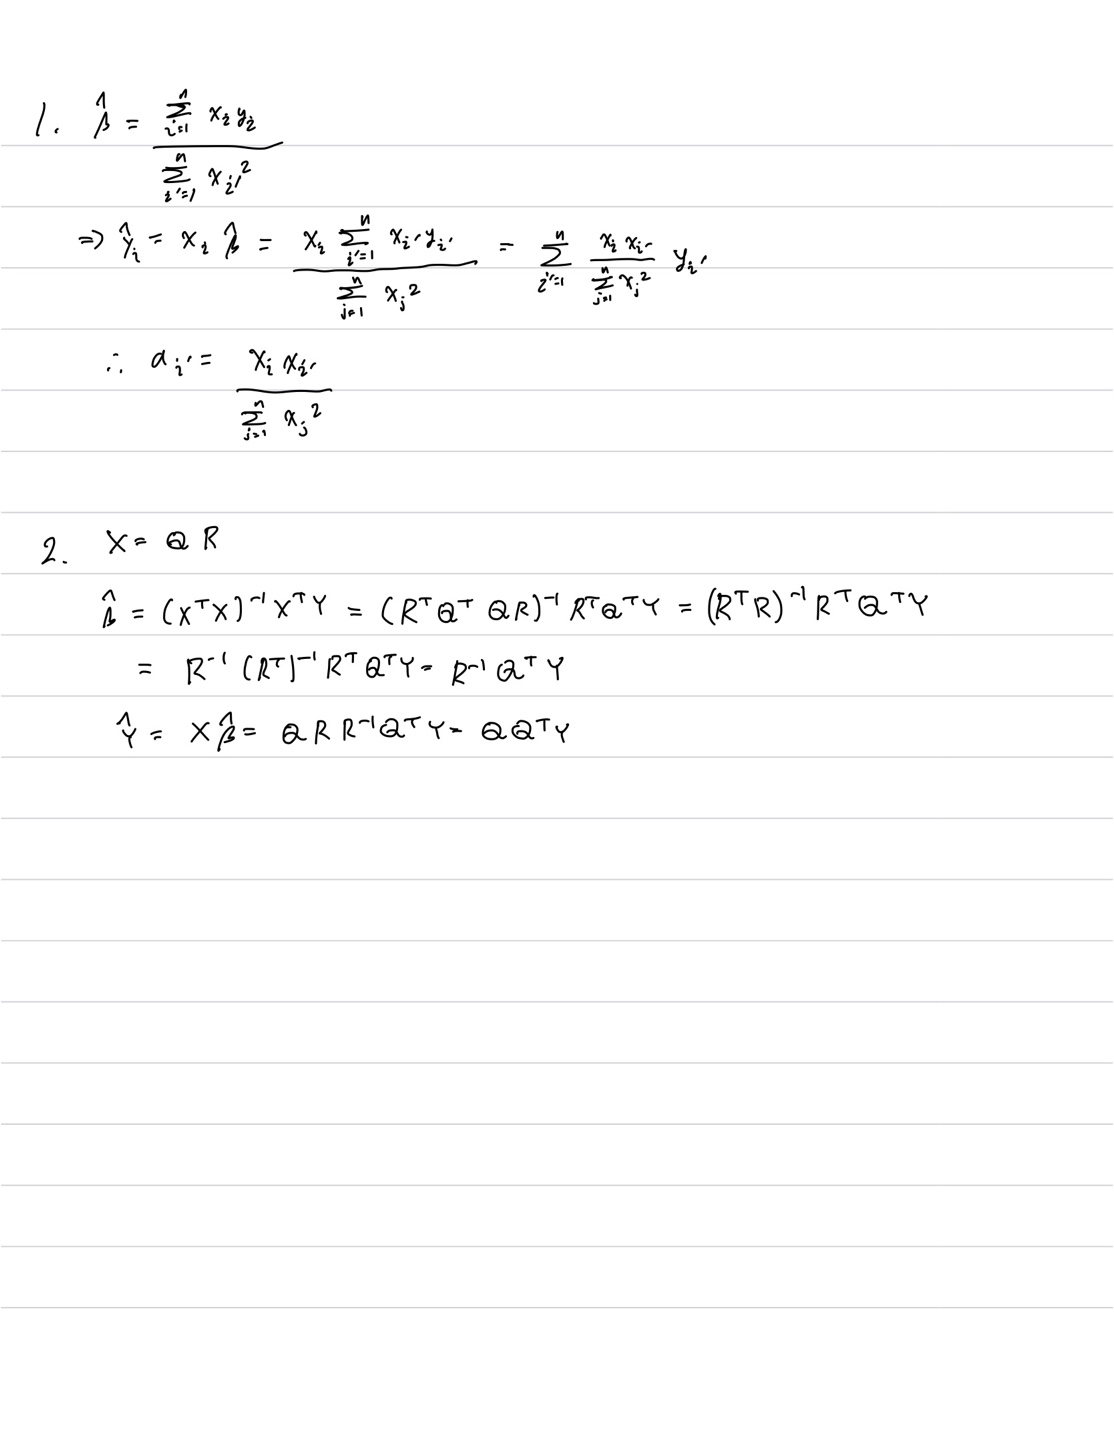

In [ ]:
# Data Import
import ssl
import pandas as pd
ssl._create_default_https_context = ssl._create_unverified_context #Github에서 데이터를 바로 불러오도록 하는 세팅입니다. 해당 코드 무시하고 데이터 받아서 쓰셔도 됩니다!
data = pd.read_csv('https://github.com/YonseiESC/ESC-21SUMMER/blob/main/week1/HW/week1_data.csv?raw=True')
y = data['mpg']
x = data.drop(['mpg'],axis=1)

In [33]:
for i in range(len(x['horsepower'])):
    if x['horsepower'][i]=='?':
        x['horsepower'][i] = 0

x['horsepower'] = pd.to_numeric(x['horsepower'])

<ipython-input-33-508d18adda68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['horsepower'][i] = 0


In [34]:
import numpy as np

In [39]:
def betahat(x,y):
    betahat = np.linalg.inv(x.T@x)@x.T@y
    return betahat

In [40]:
def yhat(x,y):
    coef = betahat(x,y)
    yhat = np.matmul(x,coef)
    return yhat

In [41]:
# 결과물 반환
betahat(x,y)

0   -0.499662
1    0.009763
2   -0.015953
3   -0.006585
4   -0.034201
5    0.606766
dtype: float64

In [42]:
yhat(x,y)

<ipython-input-40-4193e9490352>:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  yhat = np.matmul(x,coef)


0      15.916416
1      14.550465
2      16.186716
3      16.035588
4      16.121535
         ...    
392    28.846137
393    33.006833
394    32.225471
395    29.746424
396    29.035893
Length: 397, dtype: float64